#### For this homework you can get 100 points + 20 bonus points. The bonus points will be counted into your total homework score until you get the maximum homework score, 400.


### Question 1: Accuracy and interpretability (10 pts)

**a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)**

**Answer**: Consider an example of a prediction problem for cancer patients and treatment protocals ( or any disease prediction and treatment suggestion problems )  - the model uses decision tree with a large number of features giving a good accuracy as well as interpretability. The interpretability helps in understanding the classification made by the model as against to random forests model which are good on accuracy but low on interpretability. In case the model starts making wrong prediction with the new data then its easier to understand where the model is affected and rectify it or add more features or modify the model by re-training the model with new traning dataset. Though accuracy is important aspect of the prediction models still in such scenarios its more important to understand the working of the model and be able to modify it in case of any problems. 


**b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)**

**Answer**: Consider an example of prediting temperature or electricity consumption of areas for electricty grid companies, these prediction problems needs accurate models rather than interpretable models.For such problems the intention is get the maximum possible accuracy to help the decision making process. Such problems would use random forests as they are be more suitable than decision trees in terms of accuracy. Also random forest is able to discover more complex dependencies at the cost of more time for fitting, in above mentioned problems the number of variables could be huge and random forest would be do a better job than any other models. 

**c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)**

**Answer**: Individual decision trees can be easily interpreted by simply visualizing the tree structure but in case of random forest there are multiple trees thus they cannot be easily interpreted by visual inspection of the individual trees. Random forest are considered to be black box model but even these black boxes could be made white. It can be done by examinining predicted responses vs actual responses for each variable in the dataset. There are different ways to interpret the random forest models. 

**Feature importance** - What are those important features and how do they contributing in predicting the target response?
The most simple way is the importance of the variables, it can be done just by calculating the number of occurrences of a variable in the trees or by computing the amount of “impurity”. 

**treeinterpreter** - Running the interpretation algorithm with actual random forest model and data is straightforward via using the 'treeinterpreter'library that can decompose scikit-learn‘s decision tree and random forest model predictions. 

** Decision_path** - When considering a decision tree, it is intuitively clear that for each decision that a tree (or a forest) makes there is a path (or paths) from the root of the tree to the leaf, consisting of a series of decisions, guarded by a particular feature, each of which contribute to the final predictions.

###  Question 2: Build a tree by hand following exactly the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes. (30 pts + 20 pts)

30 points for parts a, b, c, d, f.
20 bonus points for optional part e.

#### Please use numpy and pandas to do the calculation for parts a) through d):

a) Prepare the data set to a pandas dataframe from the given string (2 pts)

b) Start with the entire dataset and find the most common value (3 pts)

c) Use "information gain" as your decision rule to split your data into two groups. What is the split rule and what is the maximum value of the information gain? (5 pts)

d) Repeat the process b) and c) until that you can perfectly split the training data.  Show the resulting decision tree in a format of your choice, as long as the tree structure and the prediction at each leaf node are clearly shown.  Note that you are _not_ expected to prune the tree in parts d) and e). (10 pts)

e)*OPTIONAL- 20 bonus points* 
Define a function: Tree(data_train, data_test) which learns a decision tree from data_train and uses it to predict the values for data_test.

Example:

##### Input of the desired function:

data_train="good,4,75,light\nbad,6,90,medium\nbad,4,110,medium"

data_test="?,6,95,medium\n?,4,93,light"

##### Output of the desired function should be data_test with the unknown values replaced by your tree's predictions, e.g.:

data_test_predicted="bad,6,95,medium\ngood,4,93,light"

f) Classify the following five vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  You can do this by hand using the tree structure learned in part d), or automatically using the function you wrote in part e). (10 pts)

?,4,93,weighty
?,8,70,light
?,6,113,medium
?,6,95,weighty
?,4,115,medium


In [1]:
import pandas as pd
import numpy as np
from io import StringIO

In [2]:
data = StringIO('MPG, cylinders, HP, weight\ngood, 4, 75, light\nbad, 6, 90, medium\nbad, 4, 110, medium\nbad, 8, 175, weighty\nbad, 6, 95, medium\nbad, 4, 94, light\nbad, 4, 95, light\nbad, 8, 139, weighty\nbad, 8, 190, weighty\nbad, 8, 145, weighty\nbad, 6, 100, medium\ngood, 4, 92, medium\nbad, 6, 100, weighty\nbad, 8, 170, weighty\ngood, 4, 89, medium\ngood, 4, 65, light\nbad, 6, 85, medium\ngood, 4, 81, light\nbad, 6, 95, medium\ngood, 4, 93, light')

In [3]:
car_data = pd.read_csv(data, sep=', ')

/Users/shalmali/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


### Pandas DataFrame of the given dataset

In [4]:
car_data.head()

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium


### Most common values for each feature

In [5]:
print('The most common values in MPG is:',car_data.MPG.value_counts().idxmax())

The most common values in MPG is: bad


In [6]:
print(car_data.MPG.value_counts())

bad     14
good     6
Name: MPG, dtype: int64


In [7]:
print('The most common values for number of cylinders is:',car_data['cylinders'].value_counts().idxmax())

The most common values for number of cylinders is: 4


In [8]:
print(car_data.cylinders.value_counts())

4    9
6    6
8    5
Name: cylinders, dtype: int64


In [9]:
print('The most common values in HP is:',car_data['HP'].value_counts().idxmax())

The most common values in HP is: 95


In [10]:
print(car_data.HP.value_counts())

95     3
100    2
145    1
190    1
170    1
75     1
110    1
175    1
139    1
94     1
85     1
81     1
89     1
90     1
92     1
93     1
65     1
Name: HP, dtype: int64


In [11]:
print('The most common values for weight is:',car_data['weight'].value_counts().idxmax())

The most common values for weight is: medium


In [12]:
print(car_data.weight.value_counts())

medium     8
light      6
weighty    6
Name: weight, dtype: int64


### Decision tree - Information gain function

In [13]:
try_data = [
       ['good',4,75,'light'],
       ['bad', 6, 90,'medium'],
       ['bad',4,110,'medium'],
       ['bad',8,175,'weighty'],
       ['bad', 6, 95,'medium'],
       ['bad', 4, 94,'light'],
       ['bad', 4, 95,'light'],
       ['bad', 8, 139,'weighty'],
       ['bad', 8, 190,'weighty'],
       ['bad', 8, 145,'weighty'],
       ['bad', 6, 100,'medium'],
       ['good', 4, 92,'medium'],
       ['bad', 6, 100,'weighty'],
       ['bad', 8, 170,'weighty'],
       ['good', 4, 89,'medium'],
       ['good', 4, 65,'light'],
       ['bad', 6, 85, 'medium'],
       ['good', 4, 81,'light'],
       ['bad', 6, 95,'medium'],
      ['good', 4, 93,'light']]

In [14]:
# Divides a set on a specific column. Can handle numeric or nominal values
def divideset(rows,column,value):
    """
    This function divides the rows in two sets
    """
    split_function = None
    if isinstance(value,int): # check if the value is a number i.e int or float
        split_function = lambda row:row[column]>=value
    else:
        split_function=lambda row:row[column]==value
   
   # Divide the rows into two sets and return them
    set1=[row for row in rows if split_function(row)]
    set2=[row for row in rows if not split_function(row)]
    return (set1,set2)

In [15]:
divideset(try_data,2,'95')

([],
 [['good', 4, 75, 'light'],
  ['bad', 6, 90, 'medium'],
  ['bad', 4, 110, 'medium'],
  ['bad', 8, 175, 'weighty'],
  ['bad', 6, 95, 'medium'],
  ['bad', 4, 94, 'light'],
  ['bad', 4, 95, 'light'],
  ['bad', 8, 139, 'weighty'],
  ['bad', 8, 190, 'weighty'],
  ['bad', 8, 145, 'weighty'],
  ['bad', 6, 100, 'medium'],
  ['good', 4, 92, 'medium'],
  ['bad', 6, 100, 'weighty'],
  ['bad', 8, 170, 'weighty'],
  ['good', 4, 89, 'medium'],
  ['good', 4, 65, 'light'],
  ['bad', 6, 85, 'medium'],
  ['good', 4, 81, 'light'],
  ['bad', 6, 95, 'medium'],
  ['good', 4, 93, 'light']])

In [16]:
# Create counts of possible results (the last column of each row is the result)
def uniquecounts(rows):
    """
    This function returns the unique counts
    of target variable values
    """
    results={}
    for row in rows:
# The result is the first column
        r=row[0]
        if r not in results: 
            results[r]=0
            results[r]+=1
    return results

In [18]:
# Entropy is the sum of p(x)log(p(x)) across all 
# the different possible results
def entropy(rows):
    """
    Calculates the entropy of the given data set for the target attribute.
    """
    from math import log
    log2=lambda x:log(x)/log(2)  
    results=uniquecounts(rows)
# Now calculate the entropy
    ent=0.0
    for r in results.keys():
        p=float(results[r])/len(rows)
        ent=ent-p*log2(p)
    return ent

In [19]:
entropy(try_data)

0.4321928094887363

In [20]:
class decisionnode:
      def __init__(self,col=-1,value=None,results=None,tb=None,fb=None):
        self.col=col
        self.value=value
        self.results=results
        self.tb=tb
        self.fb=fb

In [21]:
def buildtree(rows,scoref=entropy): #rows is the set, either whole dataset or part of it in the recursive call, 
                                    #scoref is the method to measure heterogeneity. By default it's entropy.
    if len(rows)==0: 
        return decisionnode() #len(rows) is the number of units in a set
  
    current_score=scoref(rows)
# Set up some variables to track the best criteria
    best_gain=0.0
    best_criteria=None
    best_sets=None
  
    column_count=len(rows[0])-1   #count the # of attributes/columns. 
#It's -1 because the last one is the target attribute and it does not count.
    for col in range(0,column_count):
    # Generate the list of all possible different values in the considered column
        global column_values        #Added for debugging
        column_values={}            
        for row in rows:
            column_values[row[col]]=1   
    # Now try dividing the rows up for each value in this column
            for value in column_values.keys(): #the 'values' here are the keys of the dictionnary
              (set1,set2)=divideset(rows,col,value) #define set1 and set2 as the 2 children set of a division
      
      # Information gain
        p=float(len(set1))/len(rows) #p is the size of a child set relative to its parent
        gain=current_score-p*scoref(set1)-(1-p)*scoref(set2) #cf. formula information gain
        if gain>best_gain and len(set1)>0 and len(set2)>0: #set must not be empty
            best_gain=gain
            best_criteria=(col,value)
            best_sets=(set1,set2)
        
# Create the sub branches   
        if best_gain>0:
            trueBranch=buildtree(best_sets[0])
            falseBranch=buildtree(best_sets[1])
            return decisionnode(col=best_criteria[0],value=best_criteria[1],
                        tb=trueBranch,fb=falseBranch)
        else:
            return decisionnode(results=uniquecounts(rows))

In [22]:
tree = buildtree(try_data)

In [23]:
def print_tree(tree,indent=''):
   # Is this a leaf node?
    if tree.results!=None:
        print(str(tree.results))
    else:
        print(str(tree.col)+':'+str(tree.value)+'? ')
        # Print the branches
        print(indent+'T->', end=" ")
        print_tree(tree.tb,indent+'  ')
        print(indent+'F->', end=" ")
        print_tree(tree.fb,indent+'  ')

In [24]:
print_tree(tree)

0:bad? 
T-> {'bad': 1}
F-> {'good': 1}


### Question 3, Predicting burden of disease （40 pts)

In [25]:
data2 = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Burden of diarrheal illness by country.csv")
print("Here are the first three rows:")
data2.iloc[0:3,:]

Here are the first three rows:


,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


#### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features using sklearn.tree.DecisionTreeClassifier. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a test/train split and choose a hyper-parameter governing model simplicity. For example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier for different values of this parameter and for each such value, record the corresponding AUC score. (10 pts)

b) Make a plot of performance vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be AUC score. (10 pts)

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the OS accuracy after tuning the hyper-parameter? (10 pts)

d) Visualize a simple decision tree (e.g. a “shallow” tree, or a tree with
few leaf nodes) classifier and report its performance. You can draw
the decision tree by hand or use a graphical representation (e.g.
http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), but make sure it is easy to understand (e.g. the
features chosen for each split should be clearly labeled in each
internal node, as well as the prediction at each leaf node). (10 pts)

In [26]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as rs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
# import required for converting multiclass to binary 
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
# import Random forest
from sklearn.ensemble import RandomForestClassifier as RFC
# import required packages for plotting the decision tree 
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus

In [27]:
## drop NA 
data2=data2.dropna()

In [28]:
## Prepare target variable and feature space:
Y = data2["BurdenOfDisease"]
X = data2.iloc[:,1:15]

There are four classes in the target attribute which makes this is a multiclass classification problem. And to use ROC we first need to convert the dataset into binary class. 

In [29]:
# Binarize the output and later use One vs Rest classifier 
# 'http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html'
y = LabelBinarizer()
Y_binary = y.fit_transform(Y)

In [30]:
# check the classes inside the labelBinarizer
y.classes_

array(['awful', 'high', 'low', 'medium'], 
      dtype='<U6')

Above result confirms the four classes in the dataset. 

In [31]:
# Split the data 
X_train,X_test,y_train,y_test=train_test_split(X, Y_binary, test_size=0.3, random_state=123)

In [32]:
# hype parameter explored is max_depth
AUC=[]
for i in range(2,50,1):
    rf = DTC(max_depth=i, random_state=123)
    rf.fit(X_train, y_train)
    pred=rf.predict(X_test)
    AUC.append(rs(y_test.ravel(),pred.ravel()))

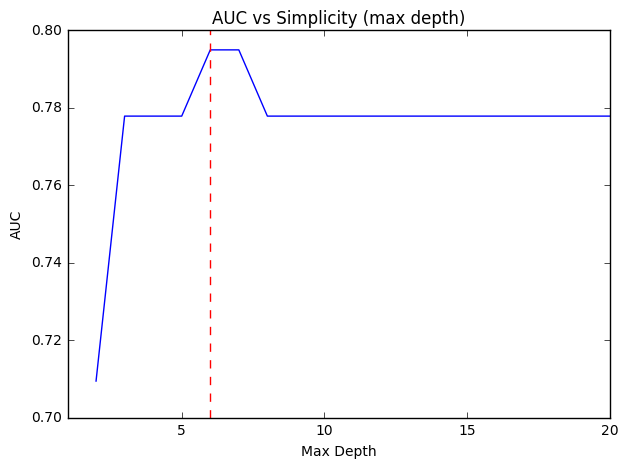

In [33]:
plt.figure(figsize=(7,5))
plt.plot(range(2,50,1),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(6,color='r',linestyle='--')
plt.xlim(1,20)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the OS accuracy after tuning the hyper-parameter? (10 pts)

In [34]:
OS = []
param_grid ={'max_depth':range(2,50,1)}

for i in range(20):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    clf = GridSearchCV(DTC(random_state=123),param_grid=param_grid)
    clf.fit(X_train,Y_train)
    OS.append(clf.score(X_test,Y_test))

In [35]:
print("The OS Accuracy is: {}".format(np.mean(OS)))

The OS Accuracy is: 0.5794871794871794


In [36]:
print(clf.best_score_)
print(clf.best_params_)

0.725274725275
{'max_depth': 4}


d) Visualize a simple decision tree (e.g. a “shallow” tree, or a tree with
few leaf nodes) classifier and report its performance. You can draw
the decision tree by hand or use a graphical representation (e.g.
http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), but make sure it is easy to understand (e.g. the
features chosen for each split should be clearly labeled in each
internal node, as well as the prediction at each leaf node). (10 pts)

In [37]:
rf1 = DTC(max_depth=6, random_state=123)
rf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [38]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf1.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:4,:]

,variables,importance
11,GDPPCptaIntDol,0.262358
13,FemaleLtrcyRate,0.23094
5,SustAccImprSanRur,0.117462
9,ExtResHlthPctTotExpHlth,0.0938936


In [39]:
X_train_simple = X_train.loc[:,['GDPPCptaIntDol', 'FemaleLtrcyRate','SustAccImprSanRur','ExtResHlthPctTotExpHlth']]
X_test_simple = X_test.loc[:,['GDPPCptaIntDol', 'FemaleLtrcyRate','SustAccImprSanRur', 'ExtResHlthPctTotExpHlth']]

In [40]:
real=Y_test
rf_check = DTC(max_depth=6) 
rf_check.fit(X_train_simple, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

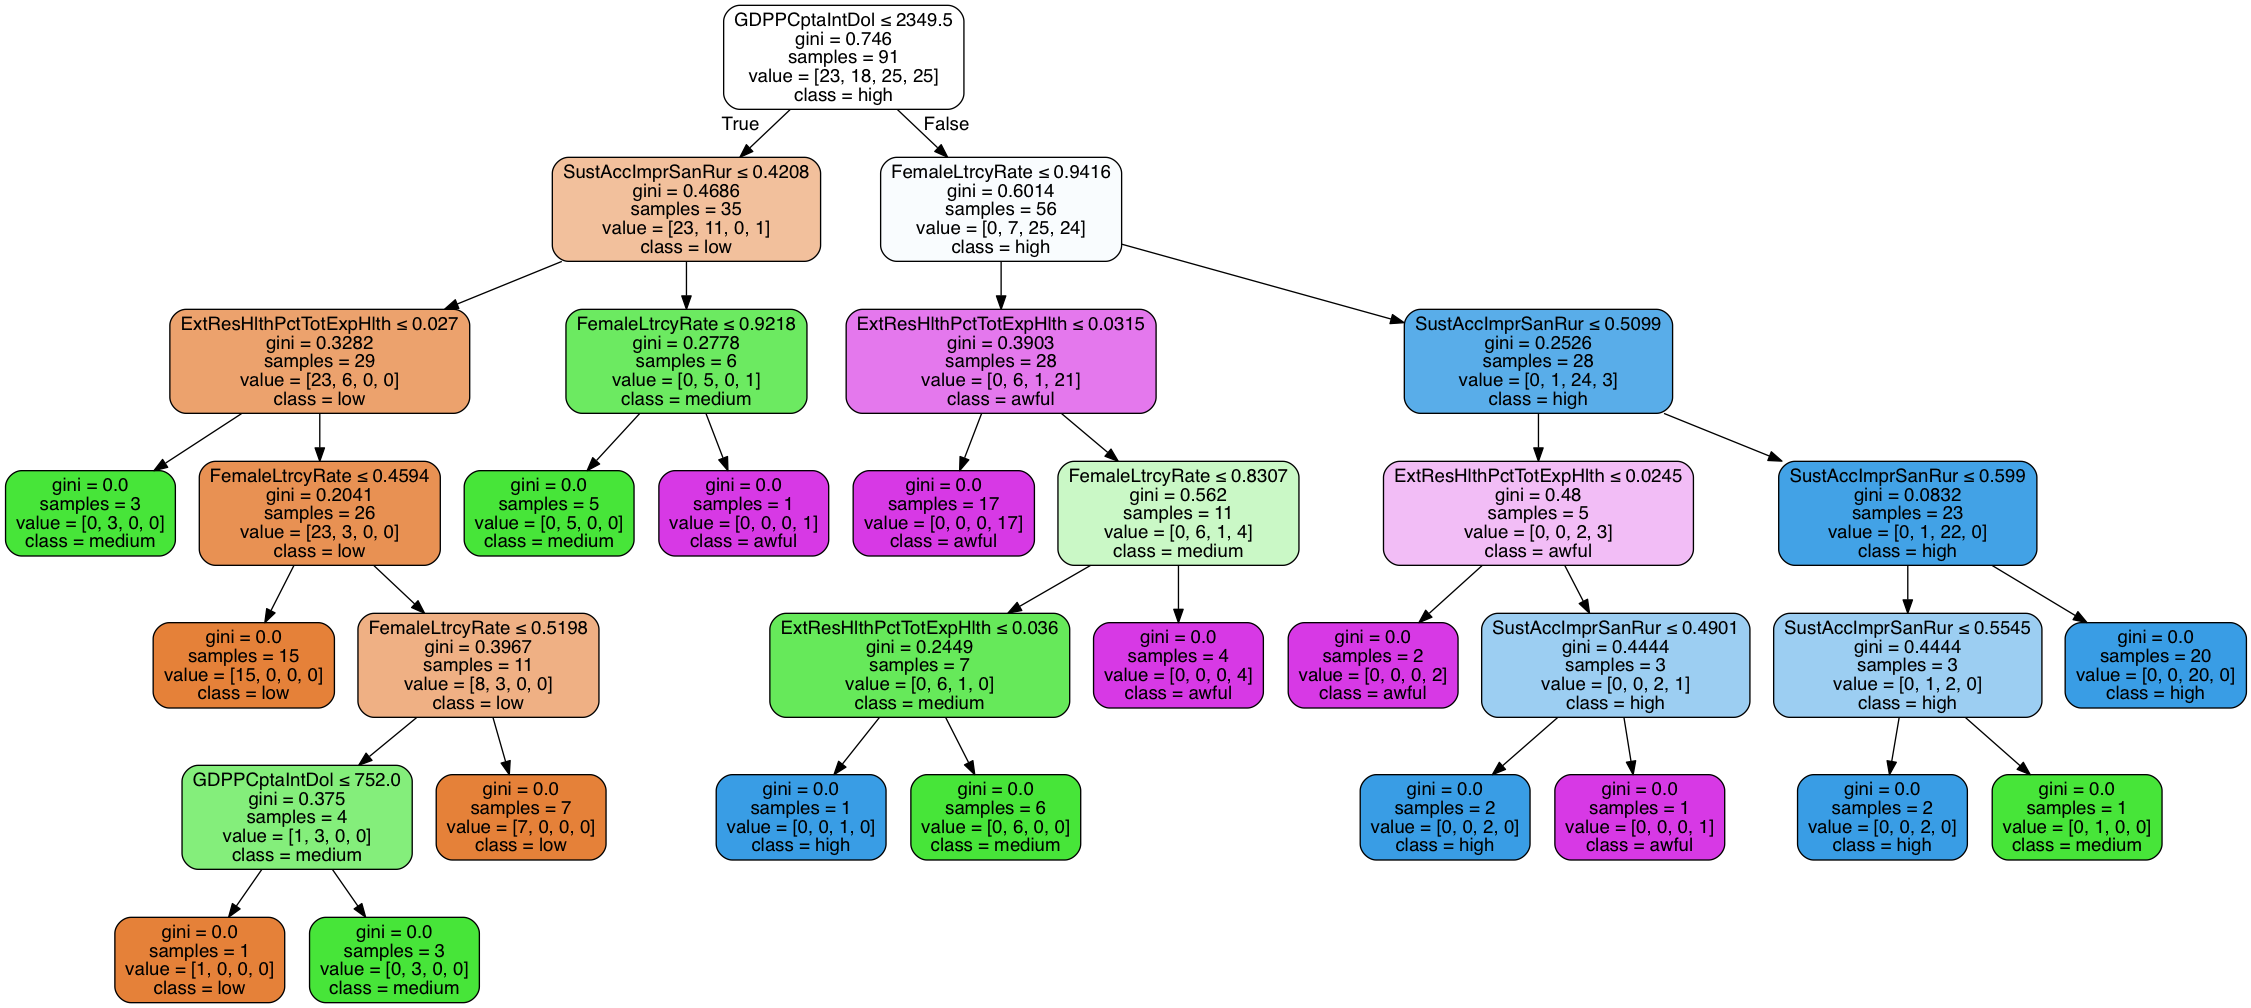

In [41]:
dot_data = StringIO()  

tree.export_graphviz(rf_check, out_file=dot_data, 
                     feature_names=['GDPPCptaIntDol', 'FemaleLtrcyRate','SustAccImprSanRur','ExtResHlthPctTotExpHlth'], 
                     class_names=["low","medium","high","awful"],  
                     filled=True, rounded=True, 
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

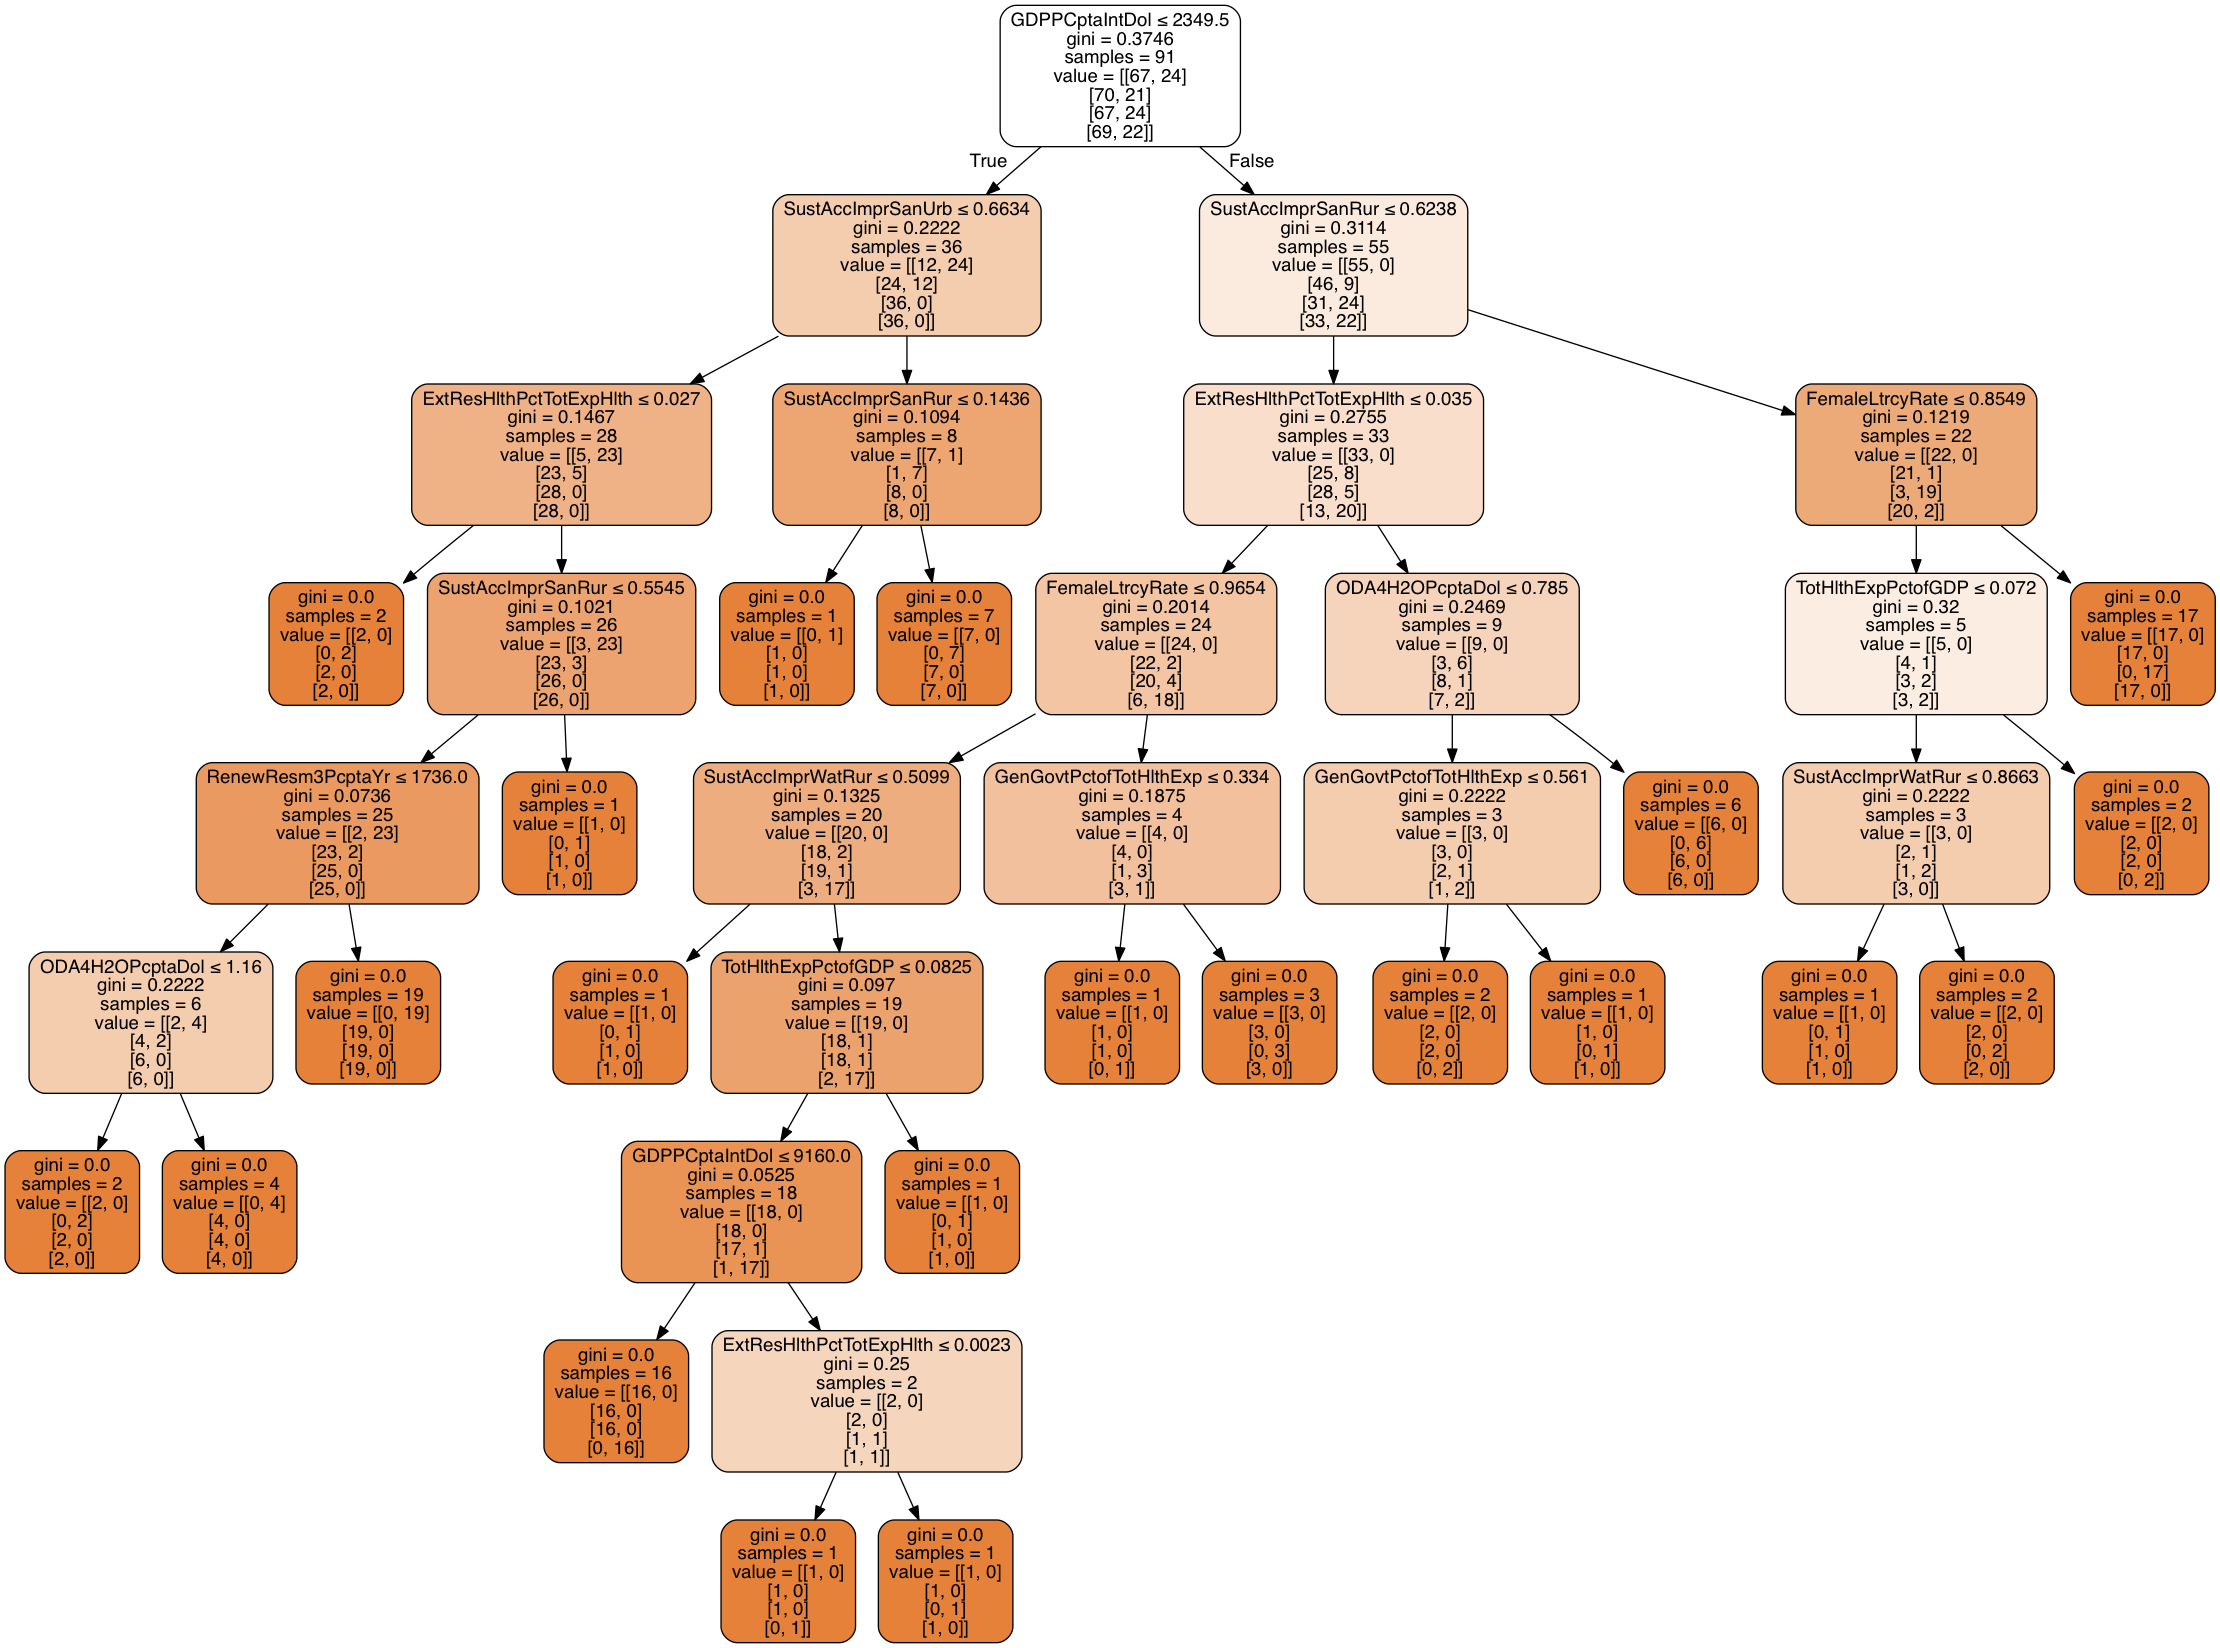

In [42]:
dot_data = StringIO()  

tree.export_graphviz(rf, out_file=dot_data, 
                     feature_names=['FrxnPeaceIn10','ODA4H2OPcptaDol','RenewResm3PcptaYr',
                                    'SustAccImprWatRur','SustAccImprWatUrb','SustAccImprSanRur',
                                    'SustAccImprSanUrb','TotHlthExpPctofGDP','GenGovtPctofTotHlthExp',
                                    'ExtResHlthPctTotExpHlth','PCptaGovtExpHlthAvgExcRt','GDPPCptaIntDol',
                                    'AdultLtrcyRate','FemaleLtrcyRate','BurdenOfDisease'], 
                     class_names=["low","medium","high","awful"],  
                     filled=True, rounded=True, 
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 2c). (10 pts)

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
rf = RFC(n_estimators=30, n_jobs=-1,max_depth=6)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
OS_RFC = []
param_grid ={'max_depth':range(2, 50, 1)}
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,
                            Y, test_size = 0.3, random_state = i)
    clf = GridSearchCV(RFC(n_estimators=30 ,n_jobs=-1), param_grid=param_grid)
    clf.fit(X_train, y_train)   
    OS_RFC.append(clf.score(X_test, y_test))

In [48]:
np.mean(OS)

0.71794871794871795

In [49]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 39}
0.791208791209


**b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)**

The result for decision tree is accuracy of - 57.9 % whereas for random forest its - 71.79% 

**Accuracy** 
The accuracy is incresed for ensemble models (random forest) than for decision tree. This increase is due to the weighted average of the each of the trees. To achieve this increase in accuracy the computation time is increased as compared to decision tree. If the parameters of the Decision tree are nearing the total number of variables, will result in a perfect or near perfect accuracy for the model, which is a clear result of overfitting, one of the drawbacks of trying to get accurate models with decision trees.
It can also be noted that for both the models that the best accuracy score calculated for random forest is more than decision tree but the respective depth of the models are very different. The random forest model has a depth of 39 to achive the maxmimum accuracy of 79% which makes the model complex and difficult to interpret where as decision tree achives the maximum accuracy of 72.5% with just a depth of 4. 

**Interpretability**
The decision tree plotted above is clearly defined and well structured making it a easy interpretable model by just visual inspection. But in case of Random forest which by definition is a ensemble of multiple decision trees is difficult to intrepret and is considered as a black box. There are methods to understand the ensemble models but they are not easy as decision trees. 
The choice of model to use is made by the which of two terms is important for the problem. Random forest models are used for higher accuracy whereas decision trees could be used for high interpretability. 

